# Importing Necessary Libraries And Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import zscore
from scipy import stats
from sklearn import preprocessing 

In [2]:
data=pd.read_csv("data.csv")

# Data Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [4]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


# Data

In [5]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [6]:
pdata = data.copy()


# From Data

In [7]:
print("Total number of unique groups {}".format(len(data['groupId'].unique())))

Total number of unique groups 870622


In [8]:
print("Total number of unique matches {}".format(len(data['matchId'].unique())))

Total number of unique matches 47951


In [9]:
print("Total number of unique matchtypes {} : {}".format(len(data['matchType'].unique()),list(data['matchType'].unique())))

Total number of unique matchtypes 16 : ['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad', 'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp', 'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp', 'normal-duo', 'normal-solo']


# Visualization Functions


In [10]:
def k_de(d,kde_status):
    fig=plt.figure(figsize=(8,8))
    ax = sns.displot(data[d],kde=kde_status)
    plt.title("distribution of {}".format(d))

def logNorm(d):
    fig=plt.figure(figsize=(8,8))
    plt.hist(np.log1p(data[d]));
    plt.title("distribution of log of {}".format(d))

def countplot(d):
    fig=plt.figure(figsize=(10,10))    
    ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[:13].index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    if any(data[d].value_counts().iloc[13:].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[13:26].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()
    if any(data[d].value_counts().iloc[26:40].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[40:50].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()        
        plt.show()    
    if any(data[d].value_counts().iloc[50:].index):
        fig=plt.figure(figsize=(10,10))
        ax=sns.countplot(x=d, data=data, palette='Greens_d',order=data[d].value_counts().iloc[50:].index)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()        
        plt.show()   
    
def hist(d):
    fig=plt.figure(figsize=(8,8))
    plt.hist(data[d]);
    plt.title("histogram of {}".format(d))

def boxplot2(c1,c2):
    fig=plt.figure(figsize=(8,8))    
    sns.boxplot(x=c1,y=c2, data=data)

def boxplot1(c1):
    fig=plt.figure(figsize=(8,8))    
    sns.boxplot(x=c1,data=data)    

def countploth(d):
    fig,ax = plt.subplots(1,1,figsize=(25,20))
    sns.countplot(data=data,x=d,hue='Gender')
    plt.xticks(rotation=90)
    plt.show()

# column seperation based on type

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericdata = data.select_dtypes(include=numerics)
numerical_col=numericdata.columns

In [12]:
categorical_col=list(set(data.columns)-set(numerical_col))

In [13]:
len(categorical_col)

4

In [14]:
categorical_col

['matchType', 'matchId', 'Id', 'groupId']

In [15]:
len(numerical_col)

26

In [16]:
numerical_col

Index(['Unnamed: 0', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc'],
      dtype='object')

# Visualizations

### UNIVARIATE ANALYSIS

KDE, HISTOGRAM , LOGNORMAL and BOXPLOT 

<Figure size 576x576 with 0 Axes>

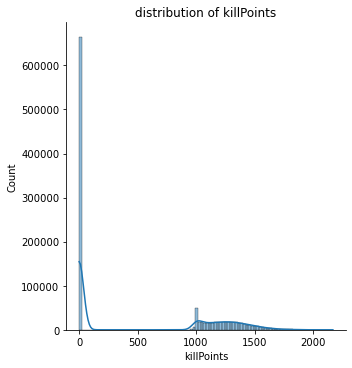

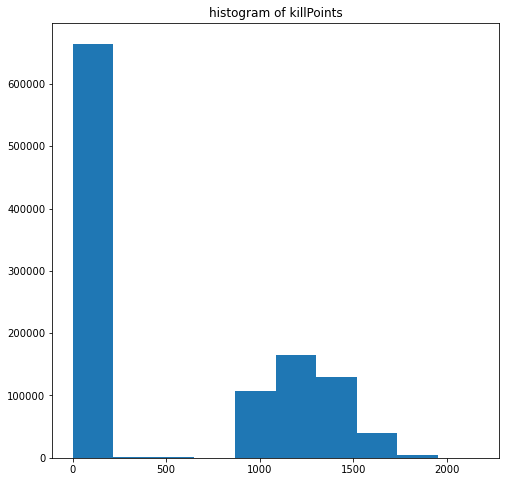

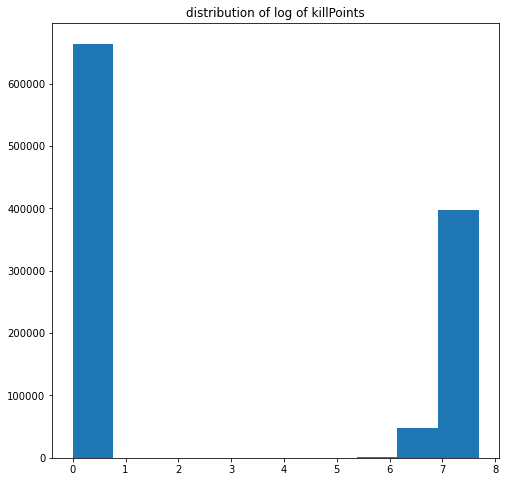

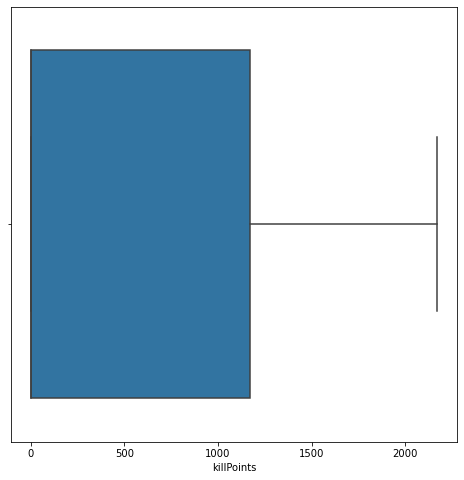

In [17]:
k_de('killPoints',True)
hist('killPoints')
logNorm('killPoints')
boxplot1('killPoints')

<b>Conclusion:

killPoints distribution is not a normal distribution .
    
there exists no outliers



<Figure size 576x576 with 0 Axes>

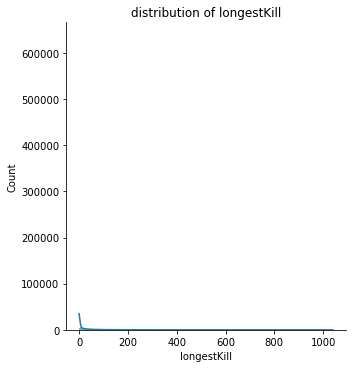

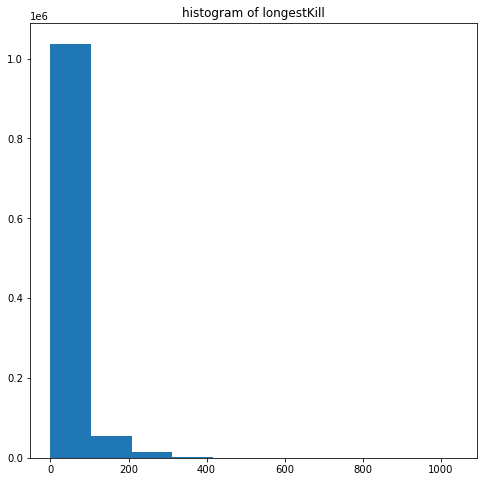

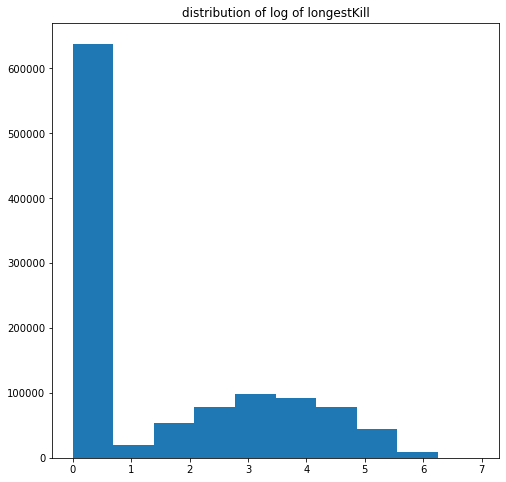

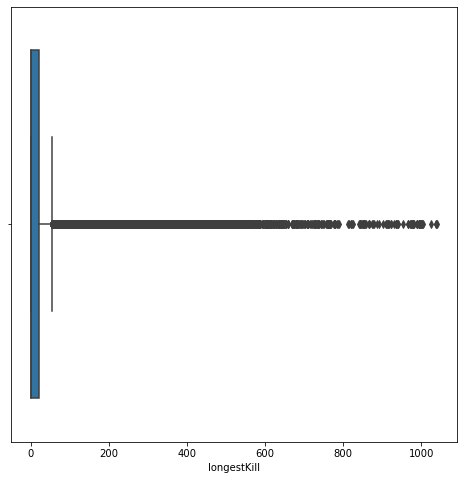

In [18]:
k_de('longestKill',True)
hist('longestKill')
logNorm('longestKill')
boxplot1('longestKill')

<b>Conclusion:

longestKill distribution is not a normal distribution .
    
there exists many outliers



<Figure size 576x576 with 0 Axes>

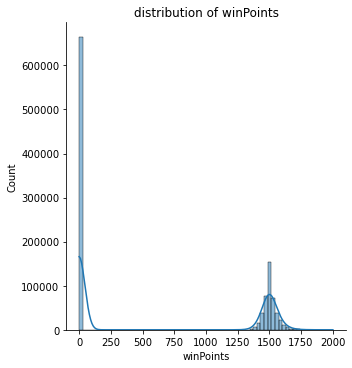

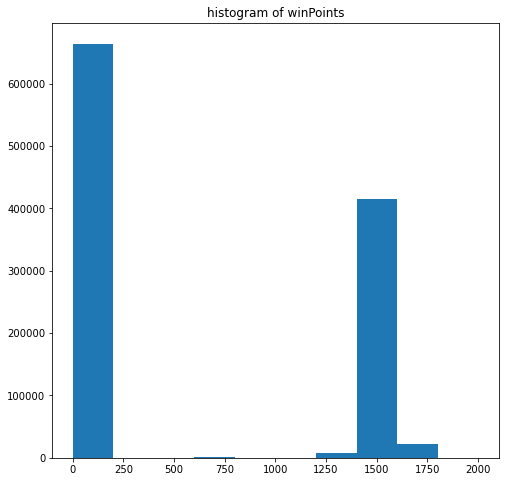

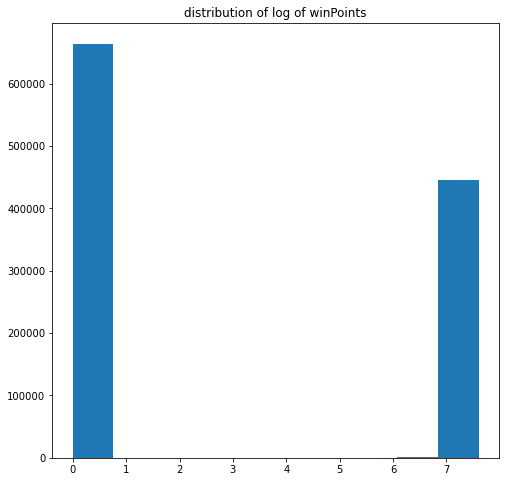

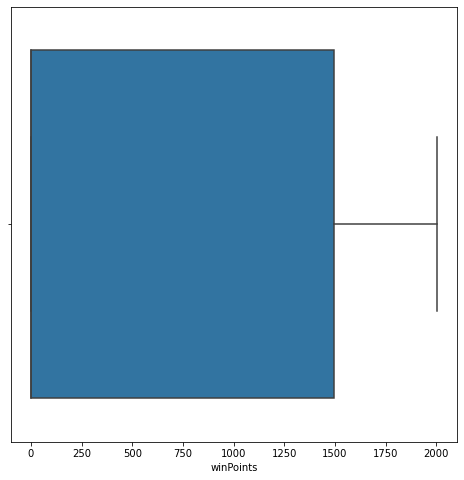

In [19]:
k_de('winPoints',True)
hist('winPoints')
logNorm('winPoints')
boxplot1('winPoints')

<b>Conclusion:

winPoints distribution is not a normal distribution .

There exists no outliers 
    

<Figure size 576x576 with 0 Axes>

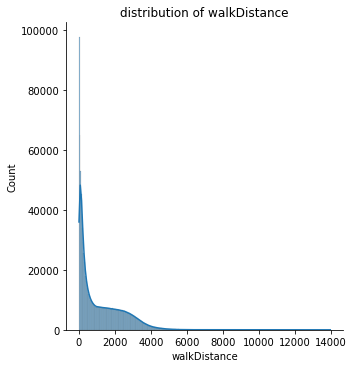

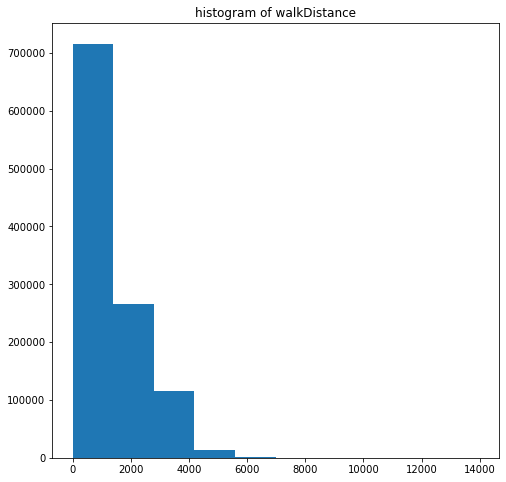

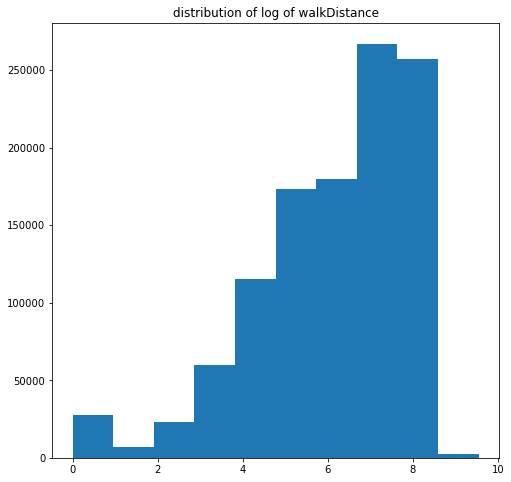

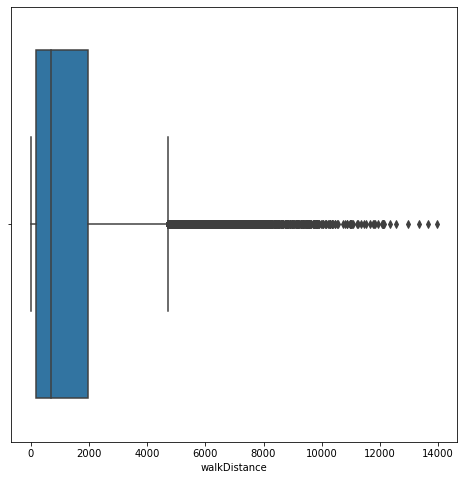

In [20]:
k_de('walkDistance',True)
hist('walkDistance')
logNorm('walkDistance')
boxplot1('walkDistance')

<b>
conclusion
   
walkDistance distribution is not a normal distribution
    
there exists many outliers

<Figure size 576x576 with 0 Axes>

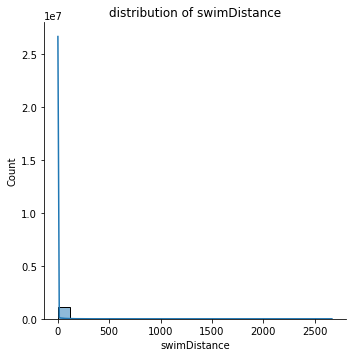

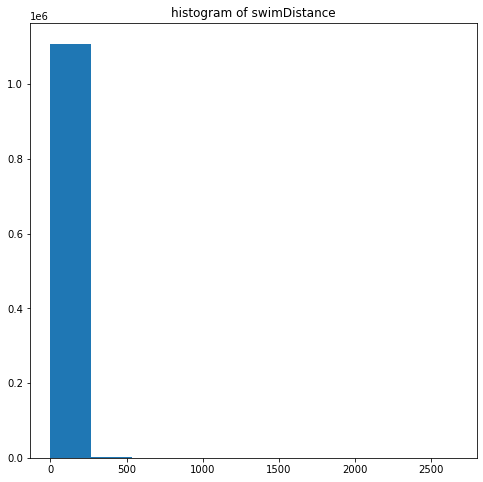

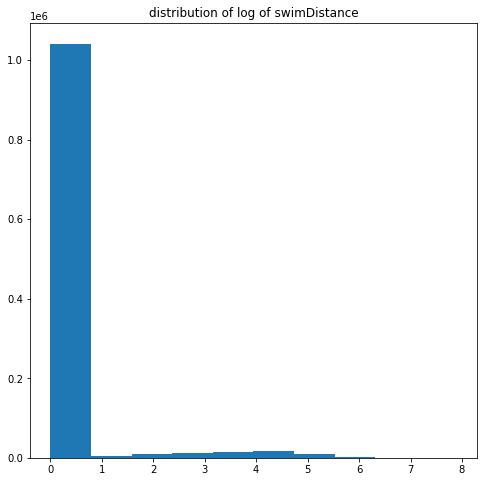

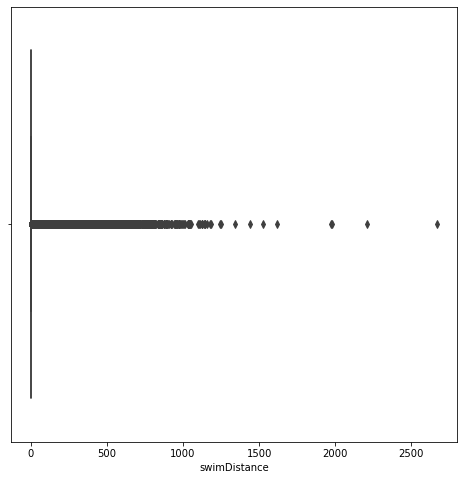

In [21]:
k_de('swimDistance',True)
hist('swimDistance')
logNorm('swimDistance')
boxplot1('swimDistance')

<b>
conclusion:
    
swimDistance distribution is not a normal distribution 

there exists few outliers    

<Figure size 576x576 with 0 Axes>

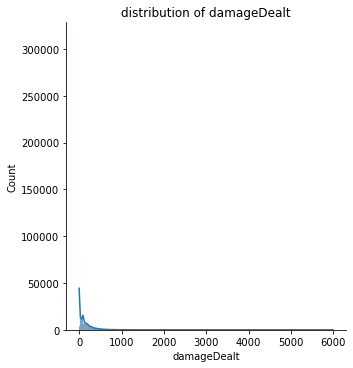

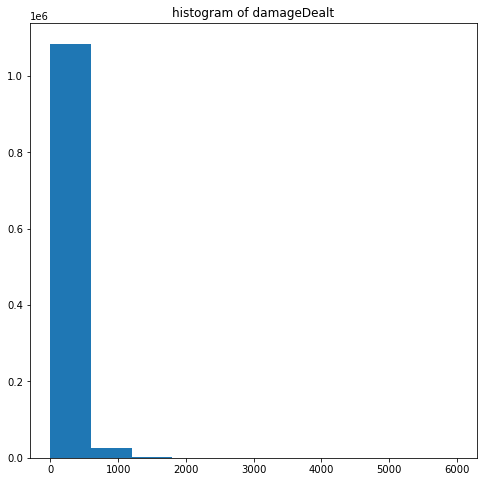

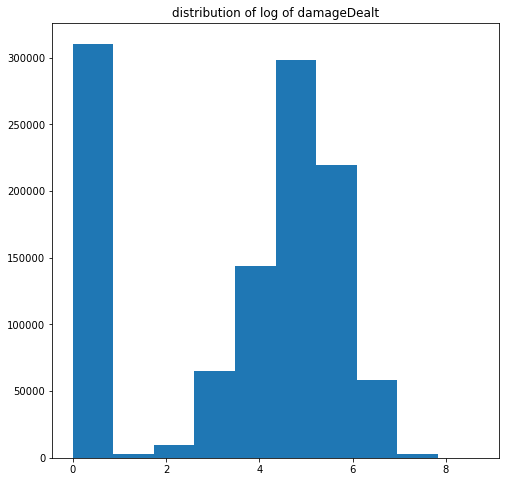

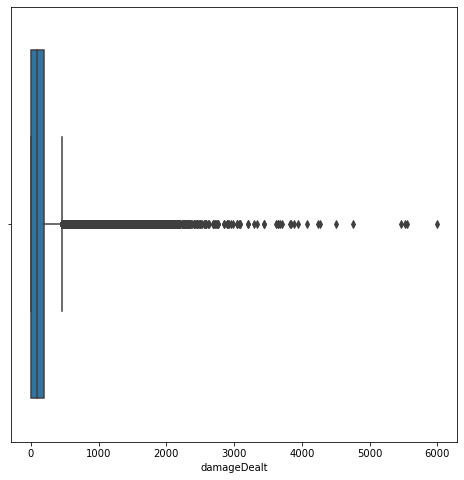

In [22]:
k_de('damageDealt',True)
hist('damageDealt')
logNorm('damageDealt')
boxplot1('damageDealt')


<b>
conclusion:
    
not a normal distribution
    
there exists many outliers    


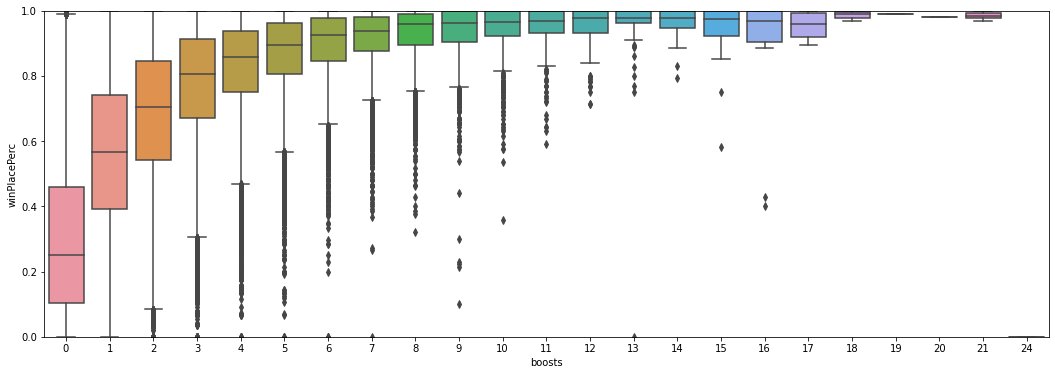

In [23]:
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='boosts', y="winPlacePerc", data=data)
fig.axis(ymin=0, ymax=1);

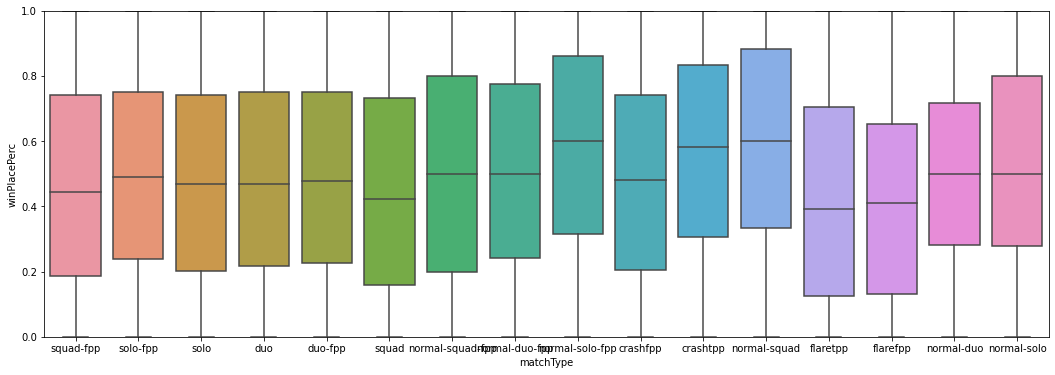

In [24]:
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='matchType', y="winPlacePerc", data=data)
fig.axis(ymin=0, ymax=1);

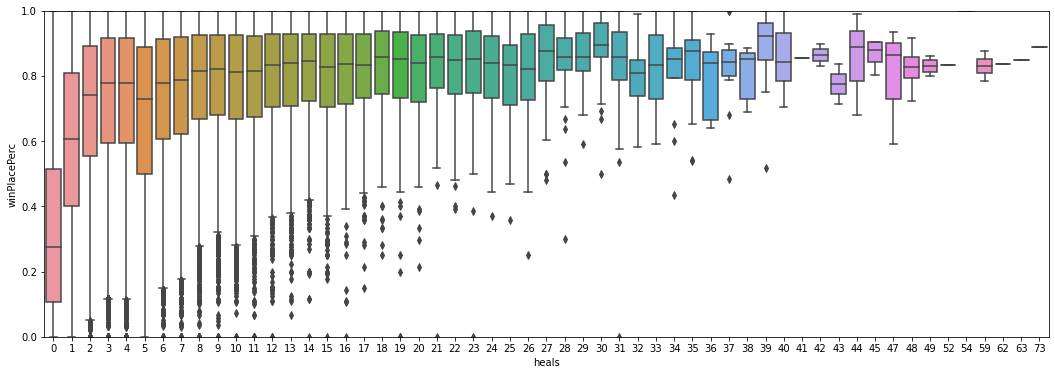

In [25]:
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='heals', y="winPlacePerc", data=data)
fig.axis(ymin=0, ymax=1);

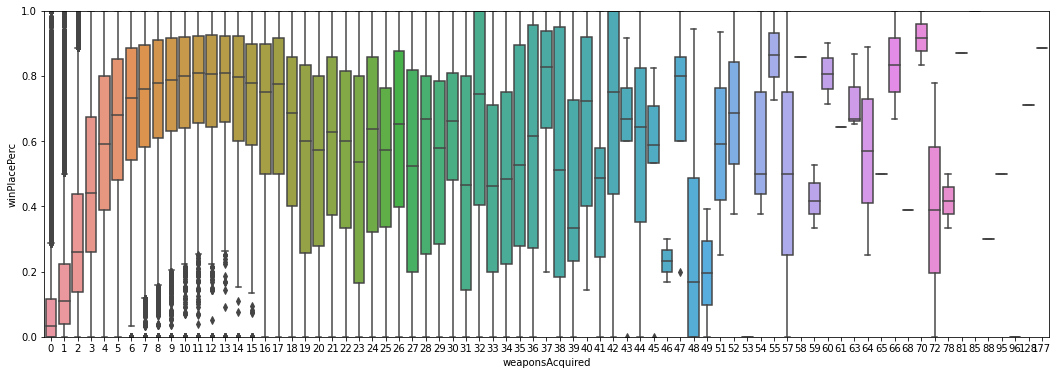

In [26]:
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='weaponsAcquired', y="winPlacePerc", data=data)
fig.axis(ymin=0, ymax=1);

In [ ]:
sns.pairplot(data[['headshotKills', 'heals','killPoints', 'kills',
       'killStreaks', 'longestKill','roadKills',
       'teamKills', 'weaponsAcquired',
       'winPoints']])

In [ ]:
px.histogram(data, x='matchType')

<b> Conclusion : many players play squad-fpp matchtype and very less players play normal solo matchtype

In [ ]:
kill_count = data['kills'].value_counts()[:38]
count = pd.DataFrame({'kills':kill_count.index, 'Number of kills':kill_count.values})
count

In [ ]:
fig=px.pie(count, values='Number of kills', names='kills')
fig.show()

<b> conclusion :
    
    many players end their game without any kill

### BIVARIATE ANALYSIS

In [ ]:
sns.scatterplot(x='kills',y='damageDealt',data=data)
plt.title('relation between kills and damage')
plt.show()

In [ ]:
sns.scatterplot(x='kills',y='boosts',data=data)
plt.title('relation between kills and boosts')
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="kills",  data=data, height=10, ratio=3, color="red")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=data, height=10, ratio=3, color="red")
plt.show()

<b>
conclusion:
    
Players who travel more distance have probability of higher  winning percentage    

In [ ]:
pdata = data[data['boosts'] < data['boosts'].quantile(0.99)]
sns.jointplot(x="winPlacePerc", y="boosts", data=data, height=10, ratio=3, color="blue")
plt.show()

<b>
Conclusion:
    
Having many healing items may result in higher winning percentage       

In [ ]:
pdata = data[data['heals'] < data['heals'].quantile(0.99)]
sns.jointplot(x="winPlacePerc", y="heals", data=data, height=10, ratio=3, color="blue")
plt.show()

<b>
Conclusion:
    
Having many healing items may result in higher winning percentage       

In [ ]:
pdata = data[data['weaponsAcquired'] < data['weaponsAcquired'].quantile(0.99)]
sns.jointplot(x="winPlacePerc", y="weaponsAcquired", data=data, height=10, ratio=3, color="blue")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=data, height=10, ratio=3, color="blue")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=data, height=10, ratio=3, color="lime")
plt.show()

In [ ]:
plt.figure(figsize=(30,20))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data,color='red',alpha=0.8)
plt.xlabel('NUMBER OF  WEAPONS ACQUIRED')
plt.ylabel('Win Percentage')
plt.title('Weapons Acquired')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(30,20))
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='red',alpha=0.8)
plt.xlabel('NUMBER OF  boosts ACQUIRED')
plt.ylabel('Win Percentage')
plt.title('boosts Acquired')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(30,20))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=0.8)
plt.xlabel('NUMBER OF  Heals ACQUIRED')
plt.ylabel('Win Percentage')
plt.title('Heals Acquired')
plt.grid()
plt.show()

In [ ]:
f,ax1 = plt.subplots(figsize =(20,20))
sns.pointplot(x='heals',y='winPlacePerc',data=pdata,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=pdata,color='blue',alpha=0.8)
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=pdata,color='red',alpha=0.8)
plt.text(4,0.6,'Heals',color='green',fontsize = 16,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 16,style = 'italic')
plt.text(4,0.50,'weaponsAcquired',color='red',fontsize = 16,style = 'italic')
plt.xlabel('Number of heal/boost items/weapons acquired',fontsize = 16,color='red')
plt.ylabel('Win Percentage',fontsize = 16,color='red')
plt.title('Heals vs Boosts vs weapons',fontsize = 20,color='red')
plt.grid()
plt.show()

<b>
Conclusion:
    
1)Having many weapons does not have a constant effect on winning percentage
    
2)Having many Healing items has positive effect on winning percentage
    
3)Having many boost items also has a positive effect on winning percentage  

In [ ]:
f,ax1 = plt.subplots(figsize =(20,20))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='green',alpha=0.8)
sns.pointplot(x='roadKills',y='winPlacePerc',data=data,color='red',alpha=0.8)
plt.xlabel('Number of vehiclesdestroyed/roadkills',fontsize = 16,color='red')
plt.ylabel('Win Percentage',fontsize = 16,color='red')
plt.text(4,0.55,'vehicleDestroys',color='green',fontsize = 16,style = 'italic')
plt.text(4,0.50,'roadKills',color='red',fontsize = 16,style = 'italic')
plt.title('vehicles destroyed vs roadkills',fontsize = 20,color='red')
plt.grid()
plt.show()

In [ ]:
sns.jointplot(data=data,x='winPlacePerc',y='kills',kind='hex')

<b>
conclusion:
    
Many players in this data have 0 kill     

### CORRELATION

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata.corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(numericdata[['headshotKills', 'heals','killPoints', 'kills',
       'killStreaks', 'longestKill','roadKills',
       'teamKills', 'weaponsAcquired',
       'winPoints']].corr(),annot=True, cbar=False ,ax=ax)
ax.set_title('Multi-Collinearity of Attributes', fontsize=30)

# OBSERVATION

## GROUPWISE MATCHES

In [ ]:
groups = data.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in each group')
groups

In [ ]:
groups.hist(bins = 70)

In [ ]:
groups.groupby('matchType').hist(bins = 70)

# NEW COLUMN ADDITION

### creating total distance travelled column (tdist)

In [ ]:
data['tdist']=data['rideDistance']+data['swimDistance']+data['walkDistance']

In [ ]:
print("MAX distance travelled is {} \nMIN distance travelled is {} \nAVG distance travelled is {} ".format(max(data['tdist']),min(data['tdist']),np.mean(data['tdist'])))

# RESEARCH OBSERVATIONS

1)Boosts are definitely an excellent way to score more

2)More number of Kills result in higher win percentages